## 데이터 준비하기

### 데이터 불러오기 + Resize 하기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료")

PIL 라이브러리 import 완료


In [3]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.png")  
    
    print(len(images), " images to be resized.")

    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "PNG")
    
    print(len(images), " images resized.")
    
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

840  images to be resized.
840  images resized.
가위 이미지 resize 완료!


In [4]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

840  images to be resized.
840  images resized.
바위 이미지 resize 완료!


In [5]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

840  images to be resized.
840  images resized.
보 이미지 resize 완료!


In [28]:
import numpy as np

def load_data(img_path, number):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=number
    img_size=28
    color=4
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path, 2520)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2520 입니다.
x_train shape: (2520, 28, 28, 4)
y_train shape: (2520,)


라벨:  2


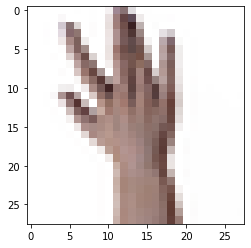

In [32]:
plt.imshow(x_train[2100])
print('라벨: ', y_train[2100])

---

## 딥러닝 네트워크 설계하기

In [33]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,4)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        592       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_5 (Dense)              (

---

## 딥러닝 네트워크 학습시키기

In [34]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 4)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))


Before Reshape - x_train_norm shape: (2520, 28, 28, 4)
After Reshape - x_train_reshaped shape: (2520, 28, 28, 4)


In [35]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
79/79 [==============================] - 1s 3ms/step - loss: 0.7067 - accuracy: 0.7369
Epoch 2/10
79/79 [==============================] - 0s 3ms/step - loss: 0.1707 - accuracy: 0.9635
Epoch 3/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9917
Epoch 4/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9952
Epoch 5/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9984
Epoch 6/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9996
Epoch 7/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 8/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 10/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000


---

## 얼마나 잘 만들었는지 확인하기 (테스트)

#### 테스트 데이터 불러오기 + Resize

In [36]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
print("가위 테스트 이미지 resize 완료!")

124  images to be resized.
124  images resized.
가위 테스트 이미지 resize 완료!


In [37]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)
print("보 테스트 이미지 resize 완료!")

124  images to be resized.
124  images resized.
보 테스트 이미지 resize 완료!


In [38]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
print("바위 테스트 이미지 resize 완료!")

124  images to be resized.
124  images resized.
바위 테스트 이미지 resize 완료!


In [39]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 372)
x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 372 입니다.
x_test shape: (372, 28, 28, 4)
y_test shape: (372,)


In [40]:
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 4)
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_test_norm shape: (372, 28, 28, 4)
After Reshape - x_test_reshaped shape: (372, 28, 28, 4)


라벨:  2


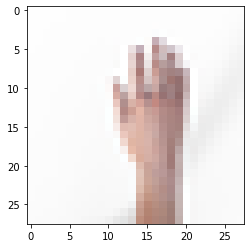

In [41]:
plt.imshow(x_test[300])
print('라벨: ', y_test[300])

#### 테스트 데이터로 성능 확인해보기

In [42]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

12/12 - 0s - loss: 0.5258 - accuracy: 0.7957
test_loss: 0.5258049368858337 
test_accuracy: 0.7956989407539368


---

### 더 좋은 네트워크 만들어보기

In [43]:
predicted_result = model.predict(x_test_reshaped) 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.03124946 0.1713457  0.7974048 ]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


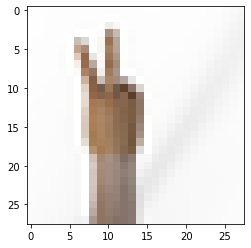

In [44]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.00083087 0.51457226 0.48459694]
라벨: 2, 예측결과: 1


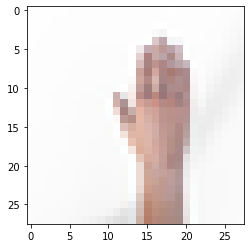

예측확률분포: [0.00100071 0.6302295  0.36876982]
라벨: 2, 예측결과: 1


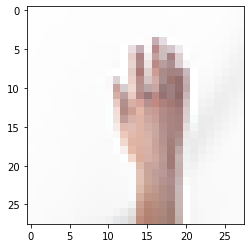

예측확률분포: [0.00099089 0.5279815  0.47102764]
라벨: 2, 예측결과: 1


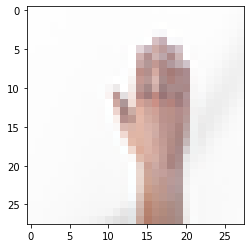

예측확률분포: [1.8921087e-06 7.7344954e-02 9.2265314e-01]
라벨: 1, 예측결과: 2


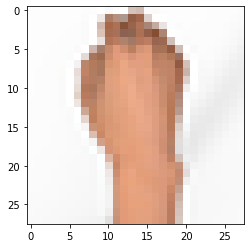

예측확률분포: [2.2570291e-06 4.9669944e-02 9.5032781e-01]
라벨: 1, 예측결과: 2


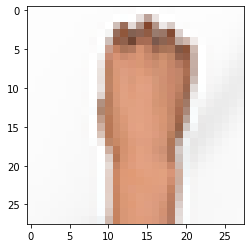

In [45]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [47]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=64
n_dense=128
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,4)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        592       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_9 (Dense)              (None, 3)                